In [10]:
import pandas as pd
df = pd.read_csv('fear_greed_index.csv')
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [13]:
df_history = pd.read_csv('historical_data.csv')
df_history.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [14]:
df['date'] = pd.to_datetime(df['date'])
df_history['Timestamp IST'] = pd.to_datetime(df_history['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_history = df_history.rename(columns={'Timestamp IST': 'date'})

In [15]:
merged_df = pd.merge(df, df_history, on='date', how='inner')
display(merged_df.head())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46535.0,0.03170,1475.16,BUY,0.00000,Open Long,0.000000,0x0004ae8e41eaab295eec040716d18501f400ce966f83...,6729928040,True,0.368789,8.930000e+14,1.700000e+12
1,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46543.0,0.50556,23530.28,BUY,0.03170,Open Long,0.000000,0x0004ae8e41eaab295eec040716d18501f400ce966f83...,6729928040,True,5.882569,8.010000e+14,1.700000e+12
2,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.6,0.75000,1825.20,SELL,0.00000,Open Short,0.000000,0xbc675ce27939e47d3632040716d1ab02017c0098c310...,6729948800,True,0.456300,8.770000e+14,1.700000e+12
3,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.4,9.52030,23166.70,SELL,-0.75000,Open Short,0.000000,0xbc675ce27939e47d3632040716d1ab02017c0098c310...,6729948800,True,5.791674,5.310000e+14,1.700000e+12
4,1705901400,55,Greed,2024-01-22,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41697.0,0.00149,62.13,BUY,-1.20143,Close Short,-0.123521,0xdaf01d746ac3146b4be9040741d6040131007c30ef85...,7679881980,True,0.015532,1.110000e+15,1.710000e+12


In [17]:
daily_volume = merged_df.groupby('date')['Size USD'].sum().reset_index()
daily_price_change = merged_df.groupby('date')['Execution Price'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
daily_price_change_pct = merged_df.groupby('date')['Execution Price'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] if x.iloc[0] != 0 else 0).reset_index()
daily_data = pd.merge(daily_volume, daily_price_change, on='date')
daily_data = pd.merge(daily_data, daily_price_change_pct, on='date')
daily_data = pd.merge(daily_data, df[['date', 'value', 'classification']], on='date')
correlation_matrix = daily_data[['value', 'Size USD', 'Execution Price_x', 'Execution Price_y']].corr()
print("Correlation Matrix:")
display(correlation_matrix)
sentiment_analysis = merged_df.groupby('classification').agg(
    average_trading_volume=('Size USD', 'mean'),
    average_price_change=('Execution Price', lambda x: (x.iloc[-1] - x.iloc[0]) if len(x) > 1 else 0)
).reset_index()
print("\nAverage Trading Volume and Price Change by Sentiment:")
display(sentiment_analysis)

Correlation Matrix:


,value,Size USD,Execution Price_x,Execution Price_y
value,1.000000,-0.152228,0.272678,0.092289
Size USD,-0.152228,1.000000,-0.277774,-0.093112
Execution Price_x,0.272678,-0.277774,1.000000,0.060593
Execution Price_y,0.092289,-0.093112,0.060593,1.000000



Average Trading Volume and Price Change by Sentiment:


,classification,average_trading_volume,average_price_change
0,Extreme Fear,349.568571,-0.0031
1,Extreme Greed,3853.764783,52443.0000
2,Fear,1598.544000,-96013.3500
3,Greed,5464.241212,57655.0000
4,Neutral,7234.347500,96735.6780


In [18]:
merged_df['profitability'] = merged_df.groupby('Account')['Execution Price'].diff().fillna(0)
risk_by_sentiment = merged_df.groupby('classification')['Execution Price'].std().reset_index()
sentiment_profitability = merged_df.groupby('classification')['profitability'].mean().reset_index()
sentiment_analysis_profit_risk = pd.merge(sentiment_profitability, risk_by_sentiment, on='classification')
sentiment_analysis_profit_risk = sentiment_analysis_profit_risk.rename(columns={'Execution Price': 'risk'})
display(sentiment_analysis_profit_risk)

,classification,profitability,risk
0,Extreme Fear,-14192.759357,0.001106
1,Extreme Greed,1057.081246,17162.121278
2,Fear,1922.372286,17895.676932
3,Greed,2937.201742,22887.229425
4,Neutral,-12292.725400,34202.571742


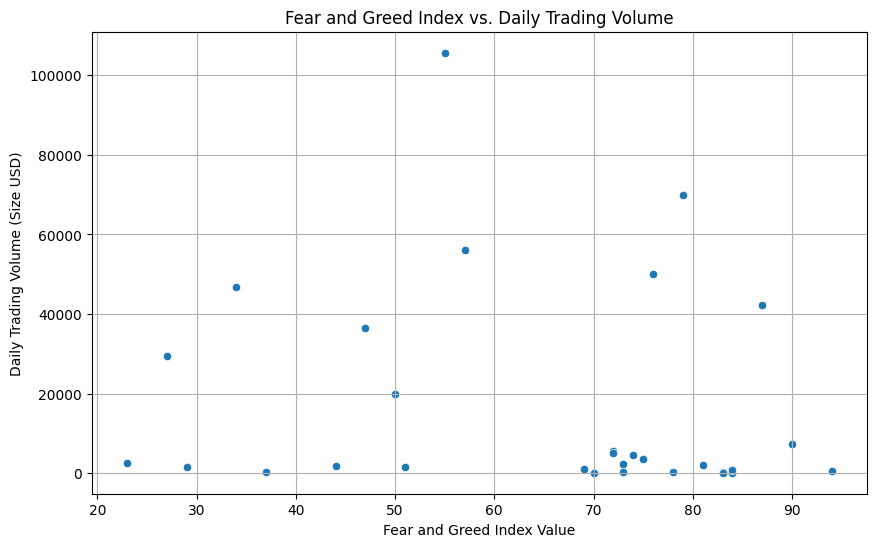

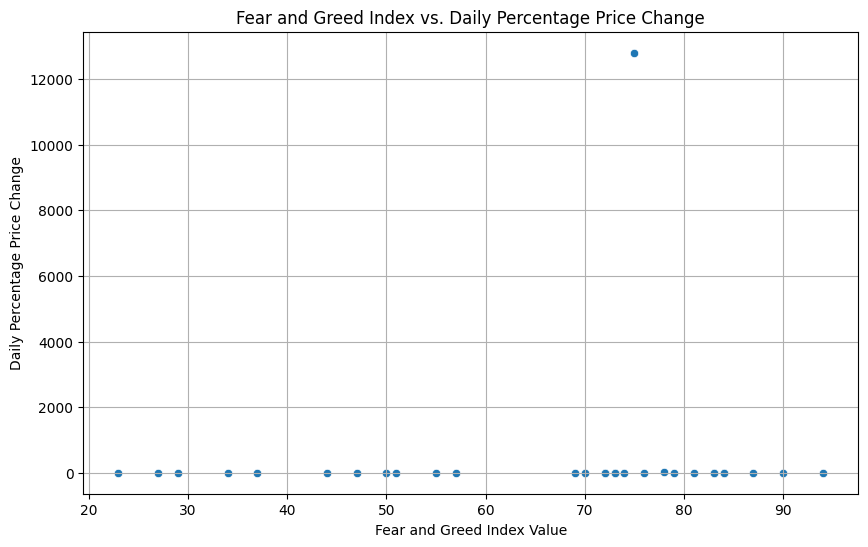

/tmp/ipython-input-1342071938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis, x='classification', y='average_trading_volume', palette='viridis')


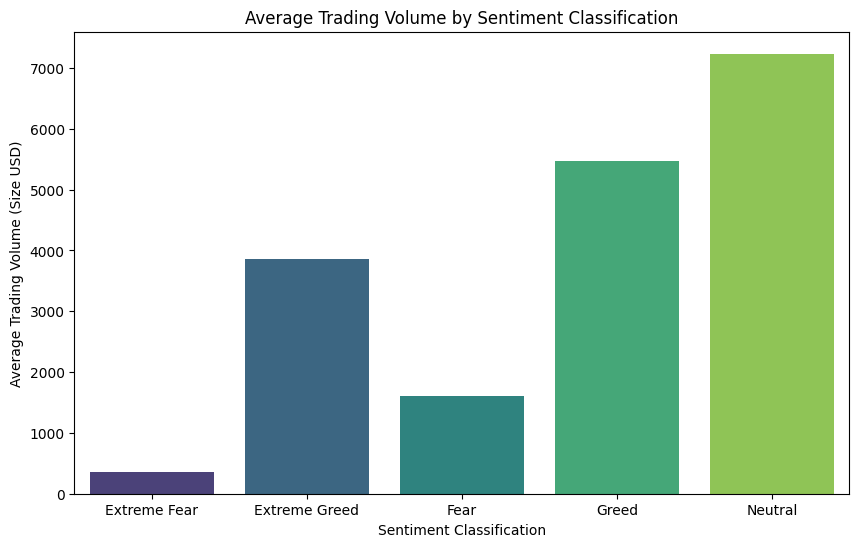

/tmp/ipython-input-1342071938.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis, x='classification', y='average_price_change', palette='viridis')


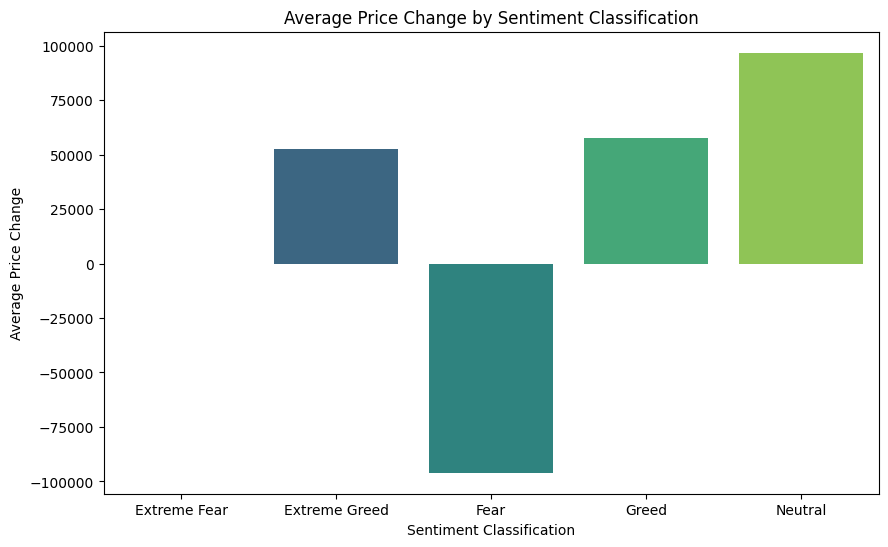

/tmp/ipython-input-1342071938.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis_profit_risk, x='classification', y='profitability', palette='viridis')


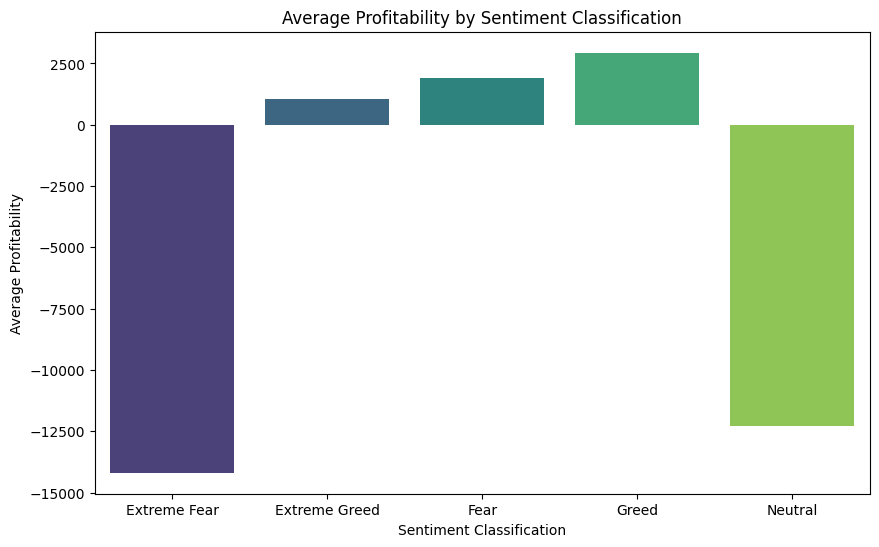

/tmp/ipython-input-1342071938.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_analysis_profit_risk, x='classification', y='risk', palette='viridis')


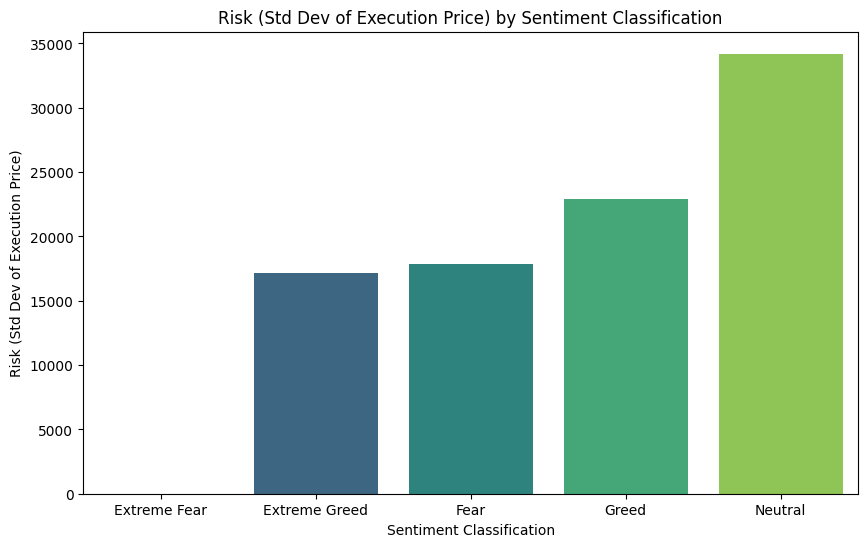

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_data, x='value', y='Size USD')
plt.title('Fear and Greed Index vs. Daily Trading Volume')
plt.xlabel('Fear and Greed Index Value')
plt.ylabel('Daily Trading Volume (Size USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_data, x='value', y='Execution Price_y')
plt.title('Fear and Greed Index vs. Daily Percentage Price Change')
plt.xlabel('Fear and Greed Index Value')
plt.ylabel('Daily Percentage Price Change')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_analysis, x='classification', y='average_trading_volume', palette='viridis')
plt.title('Average Trading Volume by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Trading Volume (Size USD)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_analysis, x='classification', y='average_price_change', palette='viridis')
plt.title('Average Price Change by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Price Change')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_analysis_profit_risk, x='classification', y='profitability', palette='viridis')
plt.title('Average Profitability by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Profitability')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=sentiment_analysis_profit_risk, x='classification', y='risk', palette='viridis')
plt.title('Risk (Std Dev of Execution Price) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Risk (Std Dev of Execution Price)')
plt.show()